<a href="https://colab.research.google.com/github/Gricay-vasily/project_9_DCGAN/blob/main/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Створено Генератор
1/1 [==============================] - 1s 539ms/step


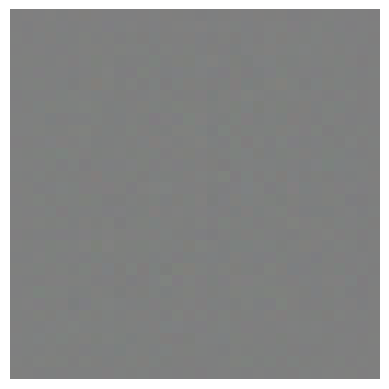

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def build_generator(nodes=4, input_dim=100, alpha=0.2):
    """Створення генератора"""
    model = tf.keras.Sequential()

    # Основа для зображення 4 * 4 * 256
    n_f_nodes = 256 * nodes * nodes
    model.add(layers.Dense(n_f_nodes, input_dim=input_dim))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Reshape((nodes, nodes, 256)))

    # Підвищення дискретизації до 8x8
    model.add(layers.Conv2DTranspose(128, (nodes, nodes), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Підвищення дискретизації до 16x16
    model.add(layers.Conv2DTranspose(128, (nodes, nodes), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Підвищення дискретизації до 32x32
    model.add(layers.Conv2DTranspose(128, (nodes, nodes), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha))

    # Вихідний шар
    model.add(layers.Conv2D(3, (3, 3), activation='tanh', padding='same'))

    print("Створено Генератор")
    return model

def preprocess_image(image_path, target_size=(32, 32)):
    """Завантаження та передобробка зображення"""
    image = Image.open('cat2.jpg')
    image = image.resize(target_size)
    image_array = np.array(image) / 127.5 - 1  # нормалізація до [-1, 1]
    image_array = np.expand_dims(image_array, axis=0)  # додавання batch dimension
    return image_array

def generate_image(generator, sample_image):
    """Генерація зображення на основі зразка"""
    # Підготовка латентного простору (шуму)
    noise = np.random.normal(0, 1, (1, 100))  # можна покращити шляхом використання особливостей sample_image

    # Генерація зображення
    generated_image = generator.predict(noise)
    generated_image = (generated_image * 127.5 + 127.5).astype(np.uint8)  # зворотна нормалізація до [0, 255]
    return generated_image

# Створення генератора
generator = build_generator()

# Завантаження та передобробка зображення
sample_image_path = 'cat2.jpg'  # замініть на шлях до вашого зразка
sample_image = preprocess_image(sample_image_path)

# Генерація зображення
generated_image = generate_image(generator, sample_image)

# Візуалізація згенерованого зображення
plt.imshow(generated_image[0])
plt.axis('off')
plt.show()
